# Competitive provision

This type of provision is used for service types such as `school`, `kindergarten` etc. Where each demand occupies some space and doesn't let any other demand occupy it.

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')
accessibility_matrix = pd.read_pickle('./../../data/saint_petersburg/accessibility_matrix_intermodal.pickle')

## Provision assessment

In [3]:
from blocksnet.config import service_types_config

service_type = 'school'
_, demand, accessibility = service_types_config[service_type].values()
demand, accessibility

(120, 15)

In most cases `max_depth=1` is optimal, but for this example `max_depth=3` will be used

In [14]:
from blocksnet.analysis.provision import competitive_provision

gdf = blocks_gdf.rename(columns={f'capacity_{service_type}':'capacity'})
blocks_df, links_df = competitive_provision(gdf, accessibility_matrix, accessibility, demand, max_depth=3)

2025-09-19 18:36:22.555 | INFO     | blocksnet.analysis.provision.competivive.core:_initialize_provision_df:29 - Initializing provision DataFrame
2025-09-19 18:36:22.559 | WARNING  | blocksnet.analysis.provision.competivive.core:_initialize_provision_df:33 - No demand in columns. Imputing using population column and demand parameter
2025-09-19 18:36:22.586 | INFO     | blocksnet.analysis.provision.competivive.core:_supply_self:56 - Supplying blocks with own capacities
2025-09-19 18:36:22.700 | INFO     | blocksnet.analysis.provision.competivive.core:competitive_provision:175 - Setting and solving LP problems until max depth or break condition reached
100%|██████████| 3/3 [00:17<00:00,  5.80s/it]
2025-09-19 18:36:40.117 | SUCCESS  | blocksnet.analysis.provision.competivive.core:competitive_provision:188 - Provision assessment finished


In [15]:
blocks_df.head()

,demand,capacity,demand_left,demand_within,demand_without,capacity_left,capacity_within,capacity_without,provision_strong,provision_weak
0,0,0,0,0,0,0,0,0,NaN,NaN
1,0,0,0,0,0,0,0,0,NaN,NaN
2,13,0,13,0,0,0,0,0,0.0,0.0
3,9,0,9,0,0,0,0,0,0.0,0.0
4,52,942,0,52,0,0,734,156,1.0,1.0


In [16]:
links_df.head()

,,value
source,target,
10,710,12.0
15,8838,1.0
35,115,35.0
39,4544,43.0
41,262,86.0


## Additional features

In [18]:
from blocksnet.analysis.provision import provision_strong_total, provision_weak_total

p_strong = provision_strong_total(blocks_df)
p_weak = provision_weak_total(blocks_df)

float(p_strong), float(p_weak)

(0.6890279622706392, 0.7433122288715732)

## Visualization

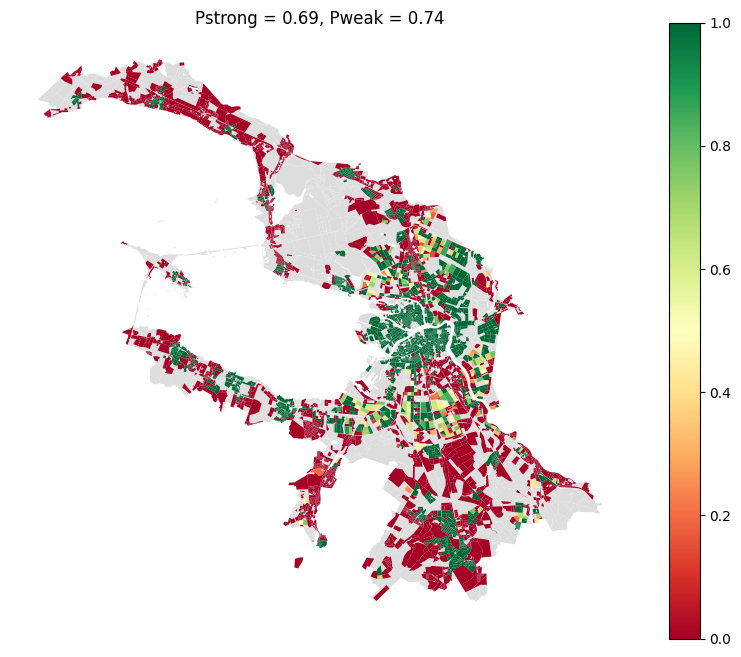

In [21]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,8))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision_strong', cmap='RdYlGn', vmin=0, vmax=1, legend=True)
ax.set_title(f'Pstrong = {round(p_strong, 2)}, Pweak = {round(p_weak, 2)}')
ax.set_axis_off()